**Ratchanon Tarawan 65070503464**

# Lab 4: Data Visualization and EDA

Objectives:
- To gain practice in creating various data visualizations
- To encourage students to perform EDA on the required dataset

***

1. Load all Superstore datasets.

*Note: The same dataset used in Lab 3*

In [1]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv(r"superstore_order.csv")
df2 = pd.read_csv(r"superstore_people.csv")
df3 = pd.read_csv(r"superstore_return.csv")


2. Determine shape of each dataset (print out the results as well).

In [2]:
df1.shape
df2.shape
df3.shape
print(df1.shape, df2.shape, df3.shape)

(8880, 21) (4, 2) (296, 2)


3. Show information of the dataset.


In [3]:
# Write your code here (3.1)
print(df1.info, df2.info, df3.info)

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  08/11/2016  11/11/2016    Second Class   
1          2  CA-2016-152156  08/11/2016  11/11/2016    Second Class   
2          3  CA-2016-138688  12/06/2016  16/06/2016    Second Class   
3          4  US-2015-108966  11/10/2015  18/10/2015  Standard Class   
4          5  US-2015-108966  11/10/2015  18/10/2015  Standard Class   
...      ...             ...         ...         ...             ...   
8875    8876  US-2016-141264  13/08/2016  19/08/2016  Standard Class   
8876    8877  US-2016-141264  13/08/2016  19/08/2016  Standard Class   
8877    8878  CA-2017-126928  17/09/2017  23/09/2017  Standard Class   
8878    8879  CA-2017-126928  17/09/2017  23/09/2017  Standard Class   
8879    8880  US-2015-107944  23/03/2015  25/03/2015     First Class   

     Customer ID    Customer Name    Segment        Country             City  \
0       CG-12520      C

4. Are there any missing values? If so, in which column?

Ans: Nothing is missing.

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [4]:
# Write your code here (5.1)
df1['Segment'].unique()


array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [5]:
chart = df1['Segment'].value_counts()
print(chart)

Consumer       4613
Corporate      2673
Home Office    1594
Name: Segment, dtype: int64


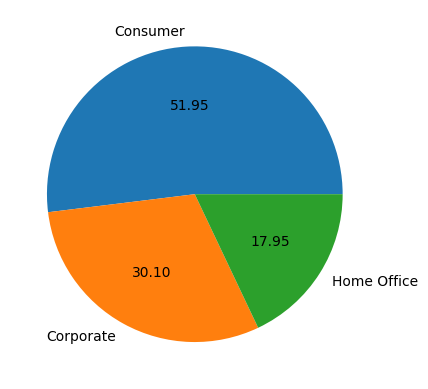

In [6]:
y = np.array(chart)
myLabels = df1['Segment'].unique()
plt.pie(y, labels = myLabels, autopct='%.2f')
plt.show()

Answer for the question 5.4

Ans: You can estimates that order that is has significant to the superstore to manage the bussiness plan in the future.

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [7]:
# Write your code here (6.1)
uniqueState = df1['State'].unique

In [8]:
top_states = df1['State'].value_counts().head(10)
print(top_states)

California        1754
New York          1001
Texas              860
Pennsylvania       531
Washington         452
Illinois           427
Ohio               396
Florida            339
Michigan           230
North Carolina     229
Name: State, dtype: int64


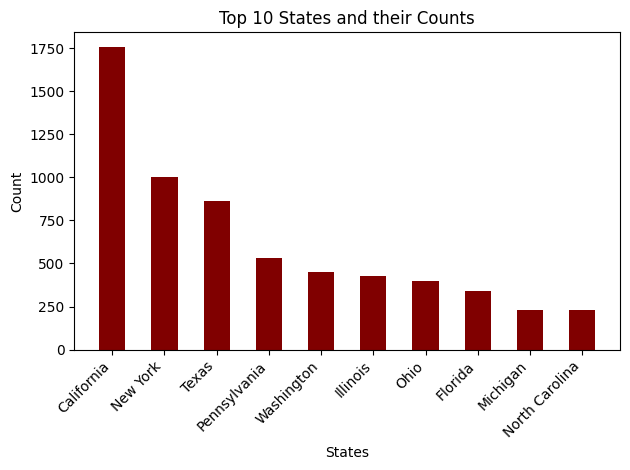

In [9]:
state_names = top_states.index
state_counts = top_states.values

plt.bar(state_names, state_counts, color='maroon', width=0.5)
plt.xlabel("States")
plt.ylabel("Count")
plt.title("Top 10 States and their Counts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
#6.4

total_sales = []
for i in top_states.index:
    sales_sum = df1[df1['State'] == i]['Sales'].sum()
    total_sales.append(sales_sum)

result_df = pd.DataFrame({
    'State': state_names,
    'Count': top_states.values,
    'Total Sales': total_sales
})

print(result_df)


            State  Count  Total Sales
0      California   1754  399195.4555
1        New York   1001  274866.8190
2           Texas    860  147855.0282
3    Pennsylvania    531  103852.5210
4      Washington    452  124497.7780
5        Illinois    427   71456.1780
6            Ohio    396   67924.2140
7         Florida    339   84083.0880
8        Michigan    230   62147.6960
9  North Carolina    229   49962.1580


Answer for the question 6.5

Ans: You can see that most top 10 state that was order that product from superstore.

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [11]:
# Write your code here (7.1)
uniqueCategory =df1['Category'].unique()
print(uniqueCategory)

['Furniture' 'Office Supplies' 'Technology']


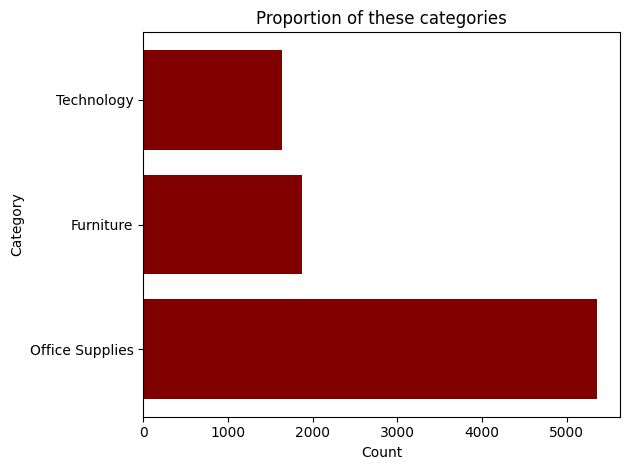

In [12]:
valueCategory = df1['Category'].value_counts()

plt.barh(valueCategory.index, valueCategory.values, color='maroon')
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Proportion of these categories")
plt.tight_layout()
plt.show()

In [13]:

valueCategory = df1['Category'].value_counts()
total_count = valueCategory.sum()

category_percentages = (valueCategory / total_count) * 100

print("Category Ratios (Percentage):")
print(category_percentages)


Category Ratios (Percentage):
Office Supplies    60.360360
Furniture          21.171171
Technology         18.468468
Name: Category, dtype: float64


8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [14]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%d/%m/%Y')
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'], format='%d/%m/%Y')

(df1[['Order Date', 'Ship Date']])

,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18
...,...,...
8875,2016-08-13,2016-08-19
8876,2016-08-13,2016-08-19
8877,2017-09-17,2017-09-23
8878,2017-09-17,2017-09-23


9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [15]:
# write your code here
df1['Processing time day'] = (df1['Ship Date'] - df1['Order Date']).dt.days
df1[['Order Date', 'Ship Date', 'Processing time day']]

,Order Date,Ship Date,Processing time day
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7
...,...,...,...
8875,2016-08-13,2016-08-19,6
8876,2016-08-13,2016-08-19,6
8877,2017-09-17,2017-09-23,6
8878,2017-09-17,2017-09-23,6


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [16]:
print(f"Number of orders that take more than 5 days: {df1[df1['Processing time day'] > 5]['Order Date'].count()}")

Number of orders that take more than 5 days: 1656


In [17]:
df1[['Order ID', 'Order Date', 'Ship Date', 'Processing time day', 'Quantity']].head()

,Order ID,Order Date,Ship Date,Processing time day,Quantity
0,CA-2016-152156,2016-11-08,2016-11-11,3,2
1,CA-2016-152156,2016-11-08,2016-11-11,3,3
2,CA-2016-138688,2016-06-12,2016-06-16,4,2
3,US-2015-108966,2015-10-11,2015-10-18,7,5
4,US-2015-108966,2015-10-11,2015-10-18,7,2


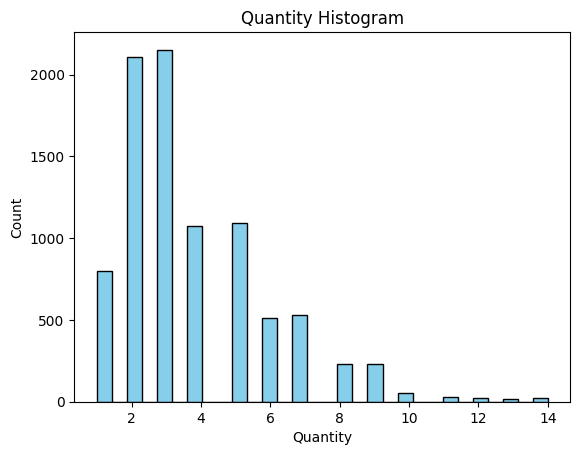

In [18]:
plt.hist(df1['Quantity'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Quantity Histogram')

plt.show()

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [181]:

df1.drop_duplicates(subset='Order ID', keep='first', inplace=True)
mergeDf = pd.merge(df1, df3, on='Order ID', how='left')
mergeDf['Returned'].fillna(0, inplace=True)

# Replace 'yes' with 1 and 'no' with 0 in the 'Returned' column
mergeDf['Returned'] = mergeDf['Returned'].replace({'yes': 1, 'Yes' :1})
mergeDf['Returned'] = pd.to_numeric(mergeDf['Returned'])

returnCounts = mergeDf.groupby('Customer ID')['Returned'].sum()
totalCustomer = len(returnCounts)
returnOnce = (returnCounts == 1).sum()
print(str(returnOnce) + ' People')
print((returnOnce/totalCustomer)*100)


186 People
23.574144486692013


In [183]:
returnAtLeastOne = (returnCounts >= 1).sum()
print(str(returnAtLeastOne) + ' People')
print((returnAtLeastOne/totalCustomer)*100)

222 People
28.13688212927757


In [184]:
noReturn = (returnCounts == 0).sum()
print(str(noReturn) + ' People')
print((noReturn/totalCustomer)*100)

567 People
71.86311787072243


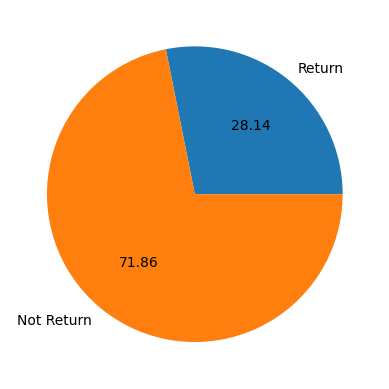

In [187]:
y = np.array([returnAtLeastOne, noReturn])
myLabels = ['Return', 'Not Return']
plt.pie(y, labels = myLabels, autopct='%.2f')
plt.show()